In [36]:
import tensorflow as tf
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist


In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [6]:
x_train.shape

(60000, 28, 28)

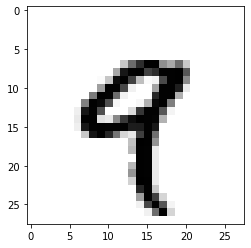

In [7]:
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

In [8]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
x_train= x_train/255
x_test= x_test/255

In [10]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#Making The model

In [45]:
model=tf.keras.models.Sequential() #a feed forward model
model.add(tf.keras.layers.Flatten()) #takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128,activation='relu')) #a simple fully connected layer
model.add(tf.keras.layers.Dense(10,activation= 'softmax')) # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #how will we calculate the error to minimize the loss
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2622 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1143 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0778 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0565 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0352 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0218 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0180 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.015

In [27]:
val_loss,val_acc=model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9794


In [28]:
val_loss


0.07479243725538254

In [29]:
val_acc


0.9793999791145325

In [32]:
model.save('E:/handwritten/Digit-Classification-master/digmodel.model')


INFO:tensorflow:Assets written to: E:/handwritten/Digit-Classification-master/digmodel.model\assets


In [33]:
new_model=tf.keras.models.load_model('E:/handwritten/Digit-Classification-master/digmodel.model')
predictions=new_model.predict(x_test)

In [44]:
predictions[44]


array([5.1041409e-15, 2.4409055e-09, 1.2885087e-09, 9.9974602e-01,
       1.4953179e-09, 2.5395679e-04, 2.3846860e-12, 7.9943052e-11,
       2.9927843e-08, 1.7000865e-08], dtype=float32)

In [37]:
y_predicted_labels = [np.argmax(i) for i in predictions]

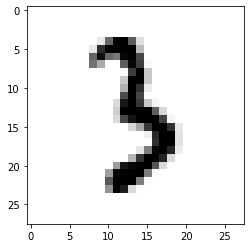

In [40]:
plt.imshow(x_test[44],cmap=plt.cm.binary)
plt.show()

In [41]:
y_predicted_labels[44]

3

Text(69.0, 0.5, 'Truth')

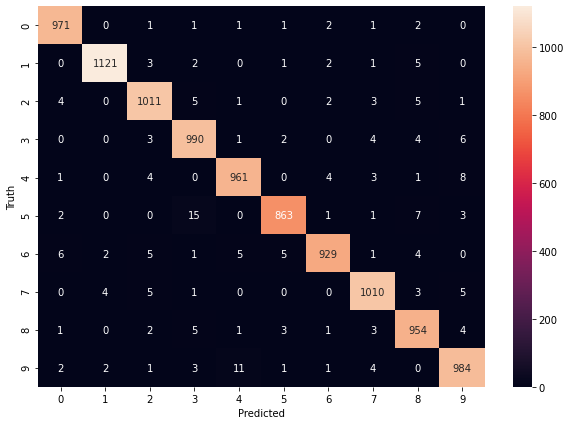

In [42]:
y_predicted = new_model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')